<a href="https://colab.research.google.com/github/25Iqbalhossain/Co2_series_injection/blob/main/Using_multiple_model_Co2_injection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The primary goal is to use time series injection and monitoring data to predict inj_diff (CO2 injection rate deltas). This prediction is crucial for validating carbon containment in the well and minimizing potential CO2 losses.


## Data loading

### Subtask:
Load the provided Excel files into pandas DataFrames.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the training data
df_train = pd.read_excel('/content/drive/MyDrive/Co2_injection/CO2_Injection_rate train.xlsx')

# Load the test data
df_test = pd.read_excel('/content/drive/MyDrive/Co2_injection/CO2_Injection_rate test exam.xlsx')

# Display the first 5 rows of the training data
display(df_train.head())

# Display the first 5 rows of the test data
display(df_test.head())

,Rand,inj_diff,Date Time,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,...,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z03D6945Ps_psi,Avg_VW1_Z03D6945Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F
0,13088,0.110069,2024-11-22 04:00:00,0.0,1105.445866,71.965004,591.478453,3320.663664,107.016855,2232.331462,...,3111.267204,119.735317,3226.319375,120.417687,3244.126398,121.219358,3230.166178,122.555278,2399.203387,112.251281
1,22365,-0.356148,2024-11-22 05:00:00,0.0,1096.617687,72.497477,570.684185,3318.985713,106.693605,2232.333350,...,3111.254573,119.743216,3227.475139,120.425360,3245.334563,121.228096,3230.438356,122.564759,2399.141585,112.255129
2,64032,-0.153921,2024-11-22 06:00:00,0.0,1096.485427,73.214516,565.322360,3322.928800,106.402567,2232.451115,...,3111.326764,119.735317,3228.699017,120.425651,3246.502317,121.227157,3230.686926,122.555278,2399.120473,112.254176
3,83725,-0.435417,2024-11-22 07:00:00,0.0,1105.192650,76.607459,620.087081,3315.569511,106.411401,2232.515324,...,3111.366945,119.737957,3229.784178,120.427391,3247.668833,121.223377,3230.968732,122.573637,2399.065426,112.258511
4,13827,0.639583,2024-11-22 08:00:00,0.0,1114.396364,76.466836,686.325817,3315.742818,106.941482,2232.518034,...,3111.368201,119.732648,3230.823012,120.429071,3248.775570,121.221532,3231.248460,122.585576,2398.982796,112.277292


,Rand,Date Time,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,...,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z03D6945Ps_psi,Avg_VW1_Z03D6945Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F
0,196,2024-12-03 18:00:00,0.0,774.488037,38.821450,549.814482,2988.571802,115.486600,2231.816545,104.111751,...,3117.072636,119.771983,3199.944727,120.774027,3216.014162,121.352003,3236.449725,122.631504,2385.961316,112.351283
1,199,2025-01-25 21:00:00,0.0,1107.391891,80.355995,582.318649,3240.670603,116.430401,2229.016689,104.330812,...,3135.347489,120.101907,3326.171334,122.083842,3339.452645,122.218568,3289.943992,122.875194,2358.261879,112.768901
2,434,2024-12-16 21:00:00,0.0,1325.434039,95.655190,662.075168,3282.452722,127.412783,2231.374359,104.182041,...,3120.309047,119.920259,3299.717979,121.131626,3315.202352,121.638310,3255.881346,122.734841,2375.674703,112.505018
3,443,2024-12-08 19:00:00,0.0,1226.120394,88.926430,562.333082,3259.085547,122.714026,2232.036442,104.105361,...,3117.042470,119.805583,3240.859595,120.960909,3257.228208,121.424663,3237.318353,122.685563,2381.629883,112.425971
4,644,2025-01-22 09:00:00,0.0,1155.092736,86.224892,621.546616,3190.583272,122.441536,2229.860781,104.325892,...,3134.689006,120.099327,3317.195166,121.984002,3331.129299,122.153006,3288.078436,122.873004,2359.305656,112.740100


## Data exploration

### Subtask:
Explore the training and test datasets to understand the data distribution, identify potential correlations, and gain initial insights.


Descriptive Statistics for Training Data:


,Rand,inj_diff,Date Time,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,...,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z03D6945Ps_psi,Avg_VW1_Z03D6945Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F
count,1715.000000,1715.000000,1715,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,...,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1713.000000,1713.000000
mean,53022.378426,-0.007752,2024-12-30 20:22:57.026239232,0.000666,1150.457307,83.242333,617.508279,3216.675287,121.955413,2230.387636,...,3126.151978,119.957127,3293.785108,121.419671,3308.257280,121.828722,3267.068193,122.771960,2370.631718,112.590825
min,7300.000000,-34.435416,2024-11-22 04:00:00,0.000000,0.000000,0.000000,0.000000,2975.924015,106.402567,2196.804702,...,3084.333799,118.249946,3188.454903,119.770593,3204.199237,120.518406,3230.166178,122.551916,2328.654811,111.007225
25%,30695.500000,-0.301922,2024-12-11 09:30:00,0.000000,1096.190075,80.112688,554.530606,3182.813527,115.984192,2229.386994,...,3117.816348,119.876431,3267.285094,121.035161,3284.257349,121.573661,3244.317251,122.699165,2360.104903,112.457695
50%,53124.000000,0.000000,2024-12-30 20:00:00,0.000000,1197.889115,88.663125,598.115537,3245.567436,123.329925,2230.415993,...,3127.587325,119.974063,3316.967108,121.366887,3330.064335,121.865260,3270.759943,122.785992,2367.725022,112.576301
75%,75580.000000,0.332813,2025-01-19 11:30:00,0.000000,1291.518661,94.745887,652.251658,3263.508081,128.120471,2231.554031,...,3134.107500,120.054500,3326.359307,121.850851,3339.579531,122.131510,3287.374198,122.844220,2379.561733,112.737579
max,99977.000000,33.709375,2025-02-07 23:00:00,0.083333,2213.751686,100.211952,15236.162200,3454.144645,132.942493,2232.866056,...,3137.476803,120.209533,3333.289994,122.464148,3346.598560,122.379221,3298.673794,122.969637,2399.203387,112.958725
std,26592.469525,4.243281,NaN,0.005535,196.706983,17.486957,452.051325,90.626214,6.852422,2.194999,...,8.363459,0.155227,43.720089,0.557121,42.355588,0.344538,21.788459,0.107047,12.455859,0.190827



Descriptive Statistics for Test Data:


,Rand,Date Time,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,...,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z03D6945Ps_psi,Avg_VW1_Z03D6945Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F
count,149.000000,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,149.000000,149.000000
mean,3787.449664,2025-01-01 13:12:28.993288704,0.000559,1146.059696,81.775323,598.734128,3208.773534,122.610767,2230.050664,104.207437,...,3126.820299,119.954588,3299.003453,121.465745,3313.149113,121.847078,3269.808628,122.781932,2369.031967,112.589286
min,196.000000,2024-11-25 11:00:00,0.000000,0.000000,0.000000,0.000000,2976.817908,110.629932,2207.338444,103.185928,...,3099.097253,118.816510,3189.503780,120.348563,3205.292767,120.704779,3232.319421,122.569495,2339.816165,111.536938
25%,1703.000000,2024-12-16 03:00:00,0.000000,1090.230581,79.803383,551.724058,3163.863527,115.938509,2229.363645,104.158611,...,3119.883093,119.895673,3290.531661,121.128041,3304.417445,121.626385,3257.036482,122.717051,2360.127175,112.471539
50%,4081.000000,2025-01-03 23:00:00,0.000000,1220.441339,87.347328,600.452462,3240.700564,124.582116,2230.354085,104.234226,...,3129.115373,119.983093,3317.193028,121.465497,3330.235339,121.919695,3275.373114,122.788687,2365.765946,112.582796
75%,5625.000000,2025-01-18 04:00:00,0.000000,1297.659337,94.914711,656.610666,3256.821895,128.178778,2231.580823,104.291407,...,3133.902322,120.059337,3327.189905,121.822846,3340.487333,122.126733,3286.832902,122.836398,2376.132931,112.739019
max,7270.000000,2025-02-07 10:00:00,0.066667,1348.453009,98.892860,741.179326,3441.434882,132.047157,2232.555436,104.360632,...,3137.409548,120.203788,3333.110919,122.443898,3346.448722,122.349582,3298.389921,122.962872,2394.952588,112.956085
std,2120.599878,NaN,0.005621,213.120445,19.899703,93.744523,97.097567,6.336912,3.151153,0.147497,...,8.179870,0.192766,40.612784,0.525926,39.401428,0.346633,20.179948,0.099983,11.606465,0.211922


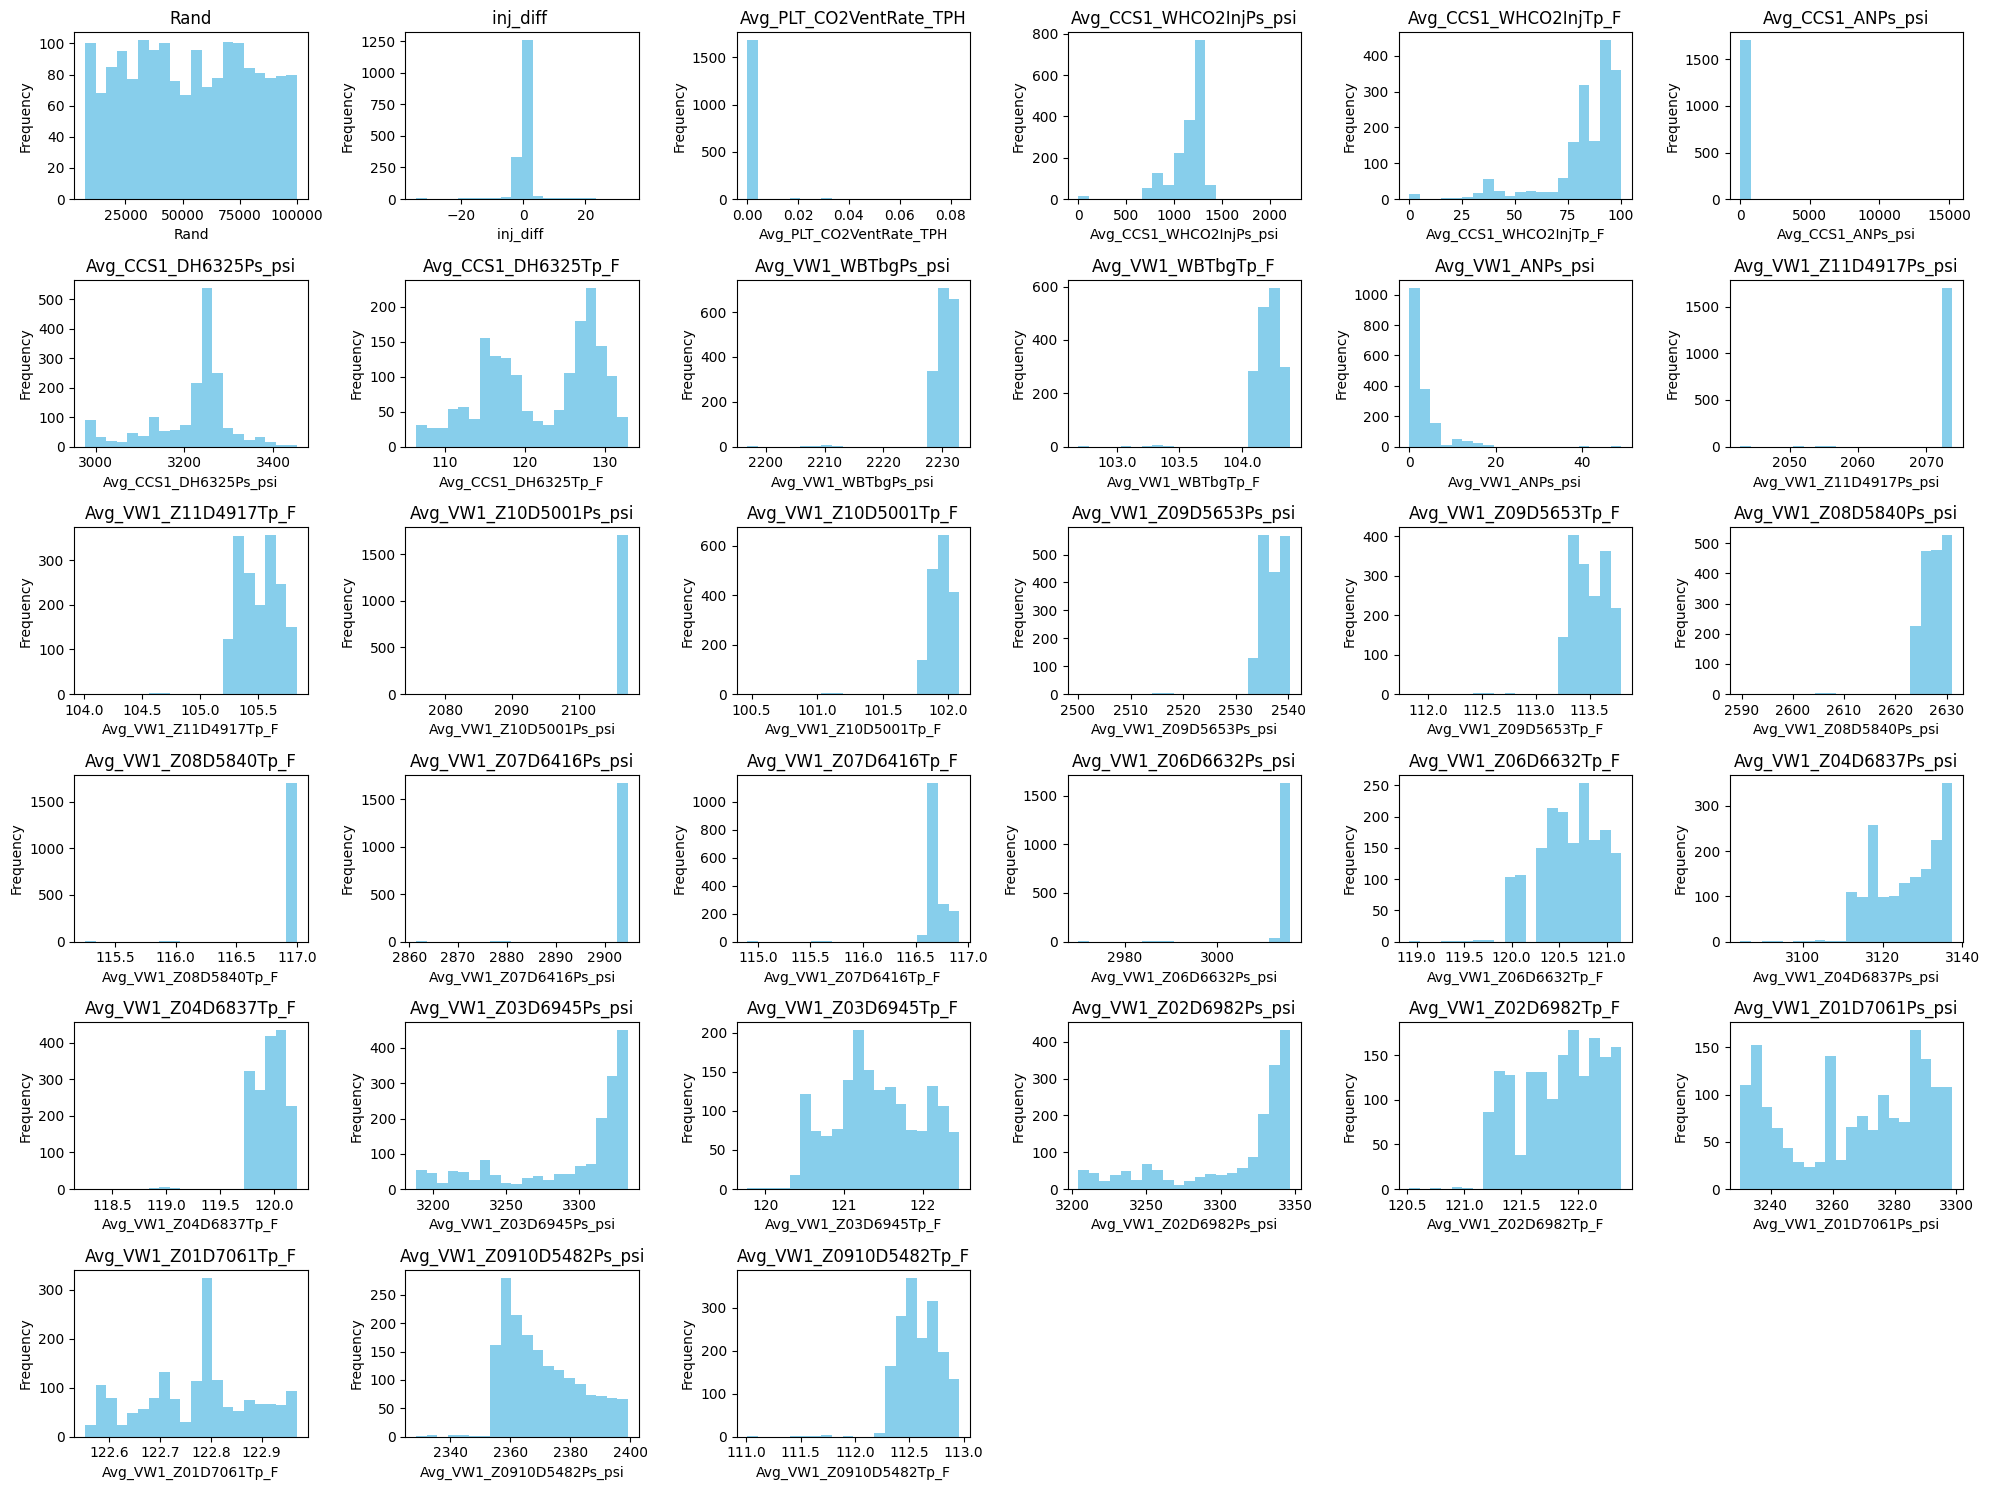

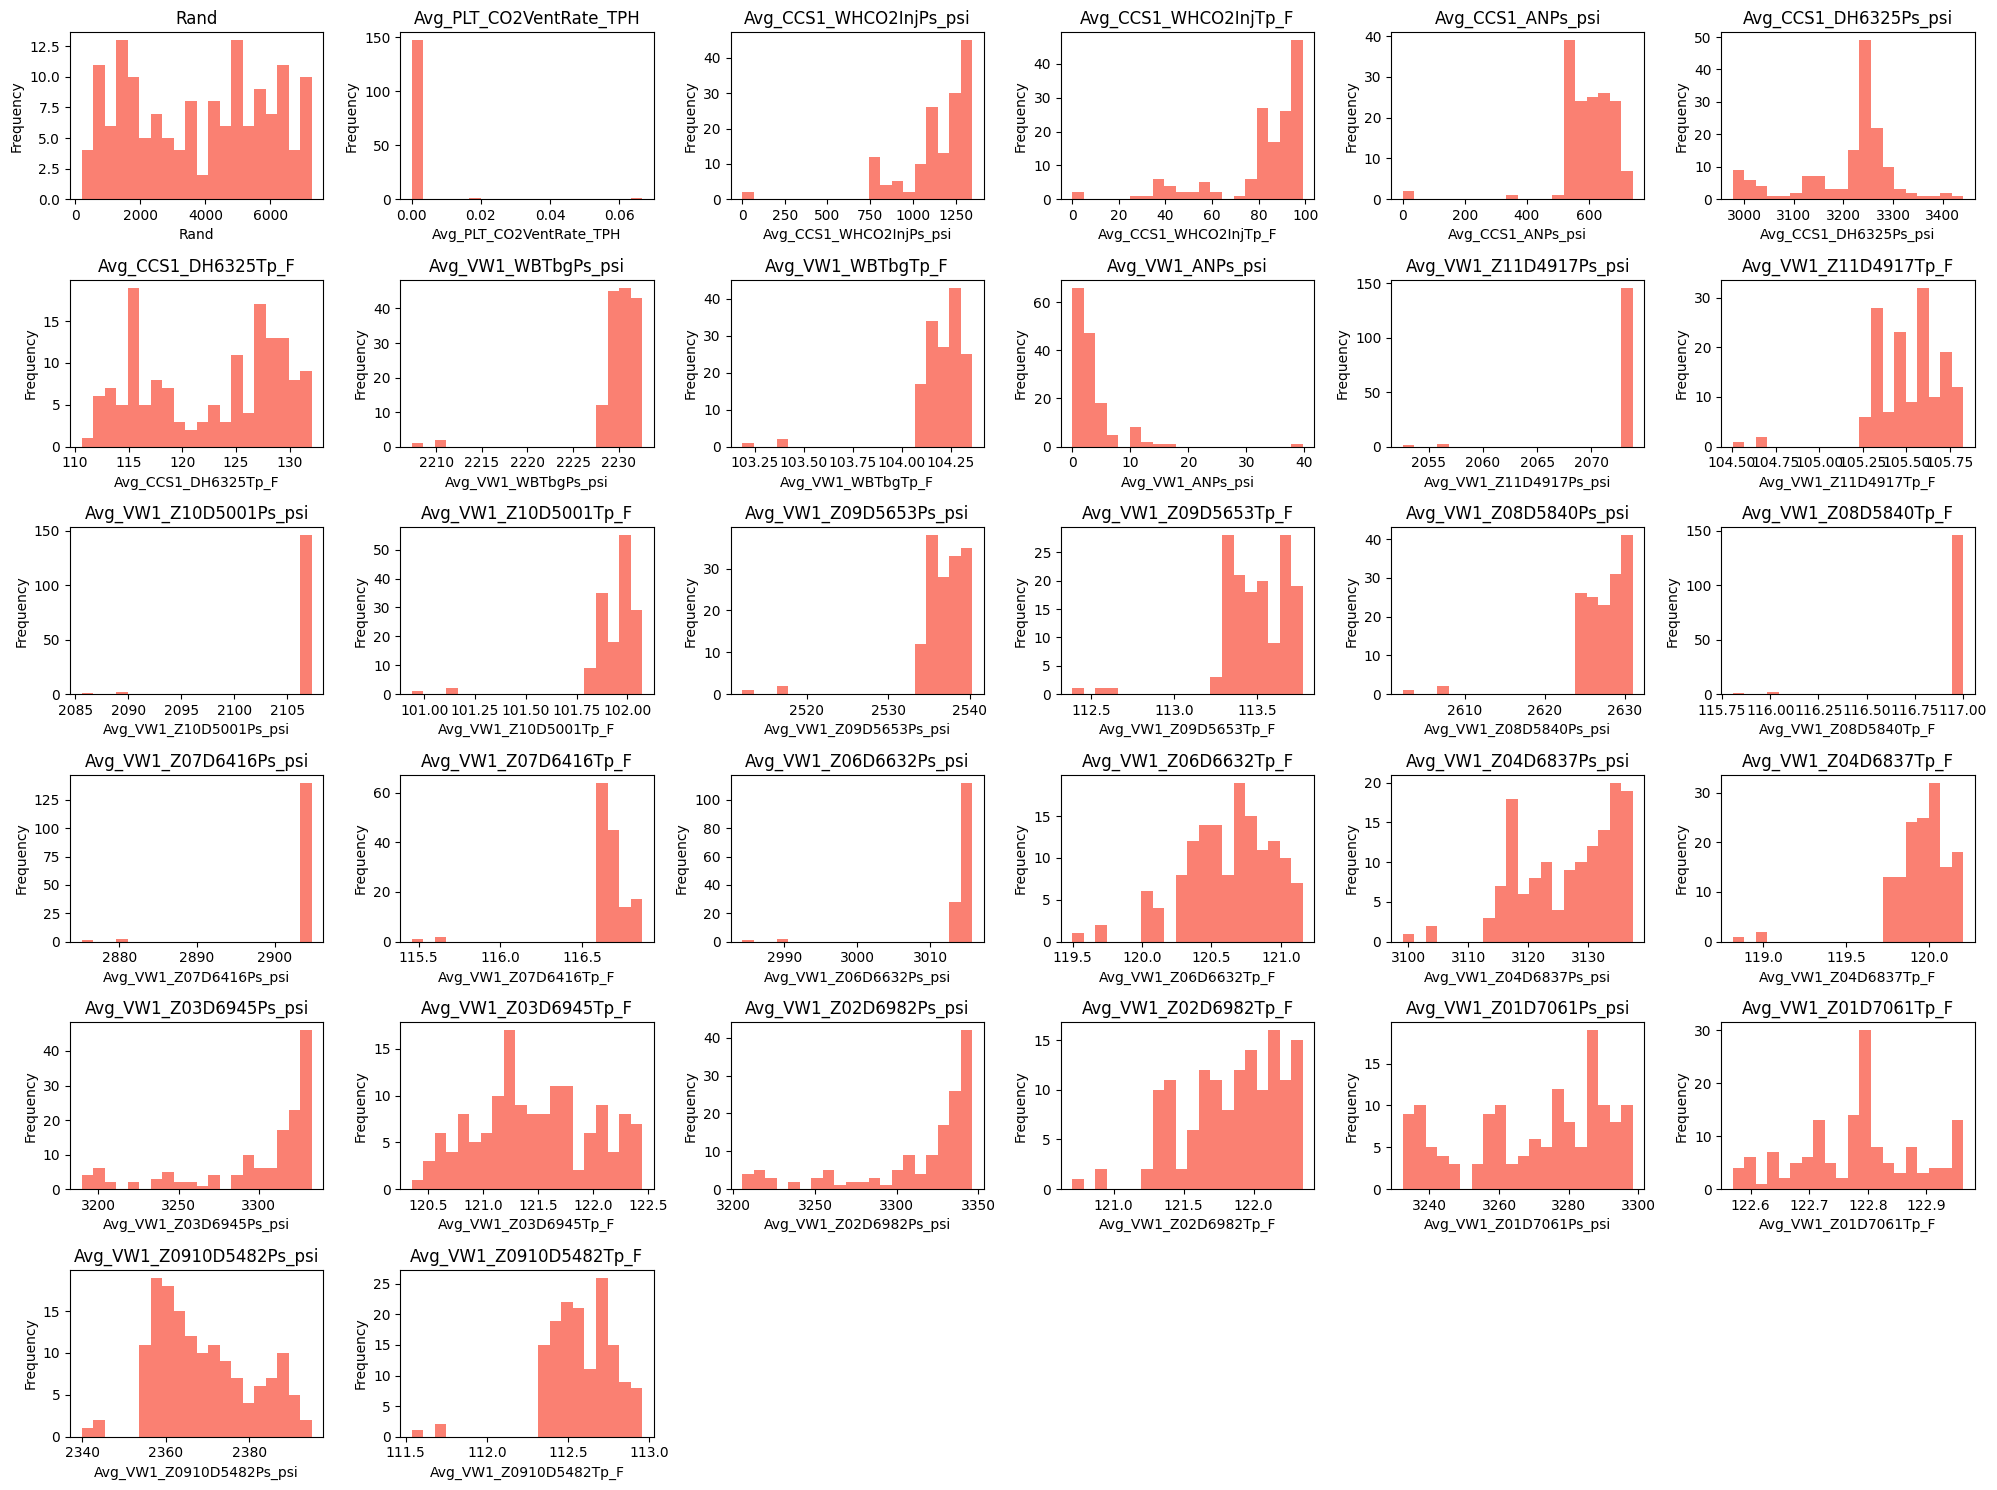

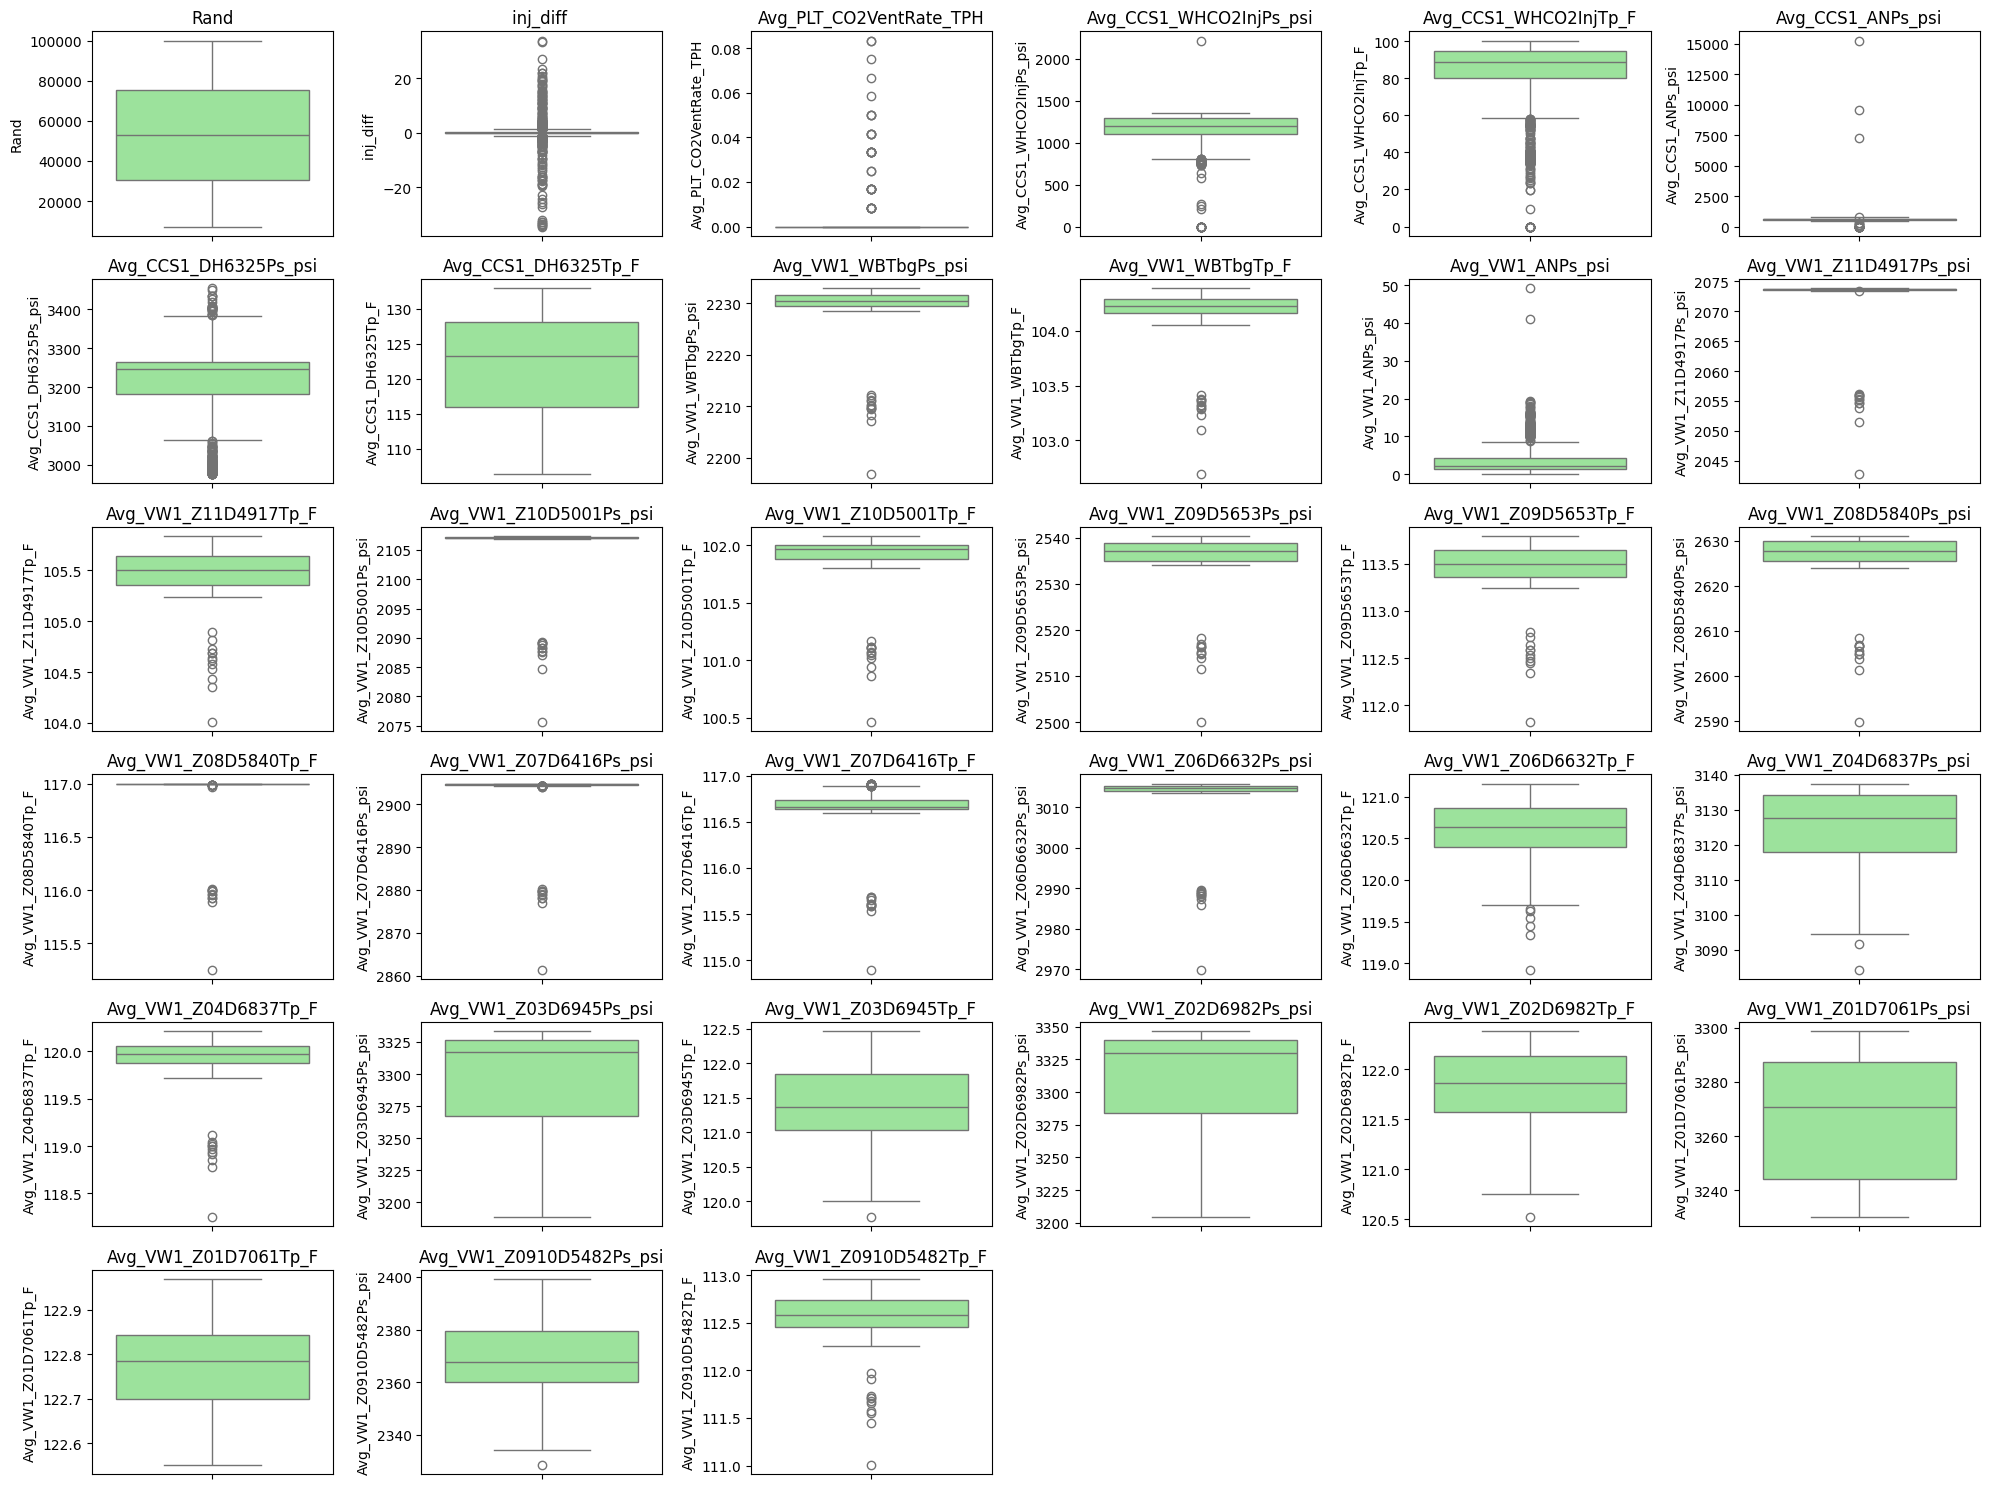

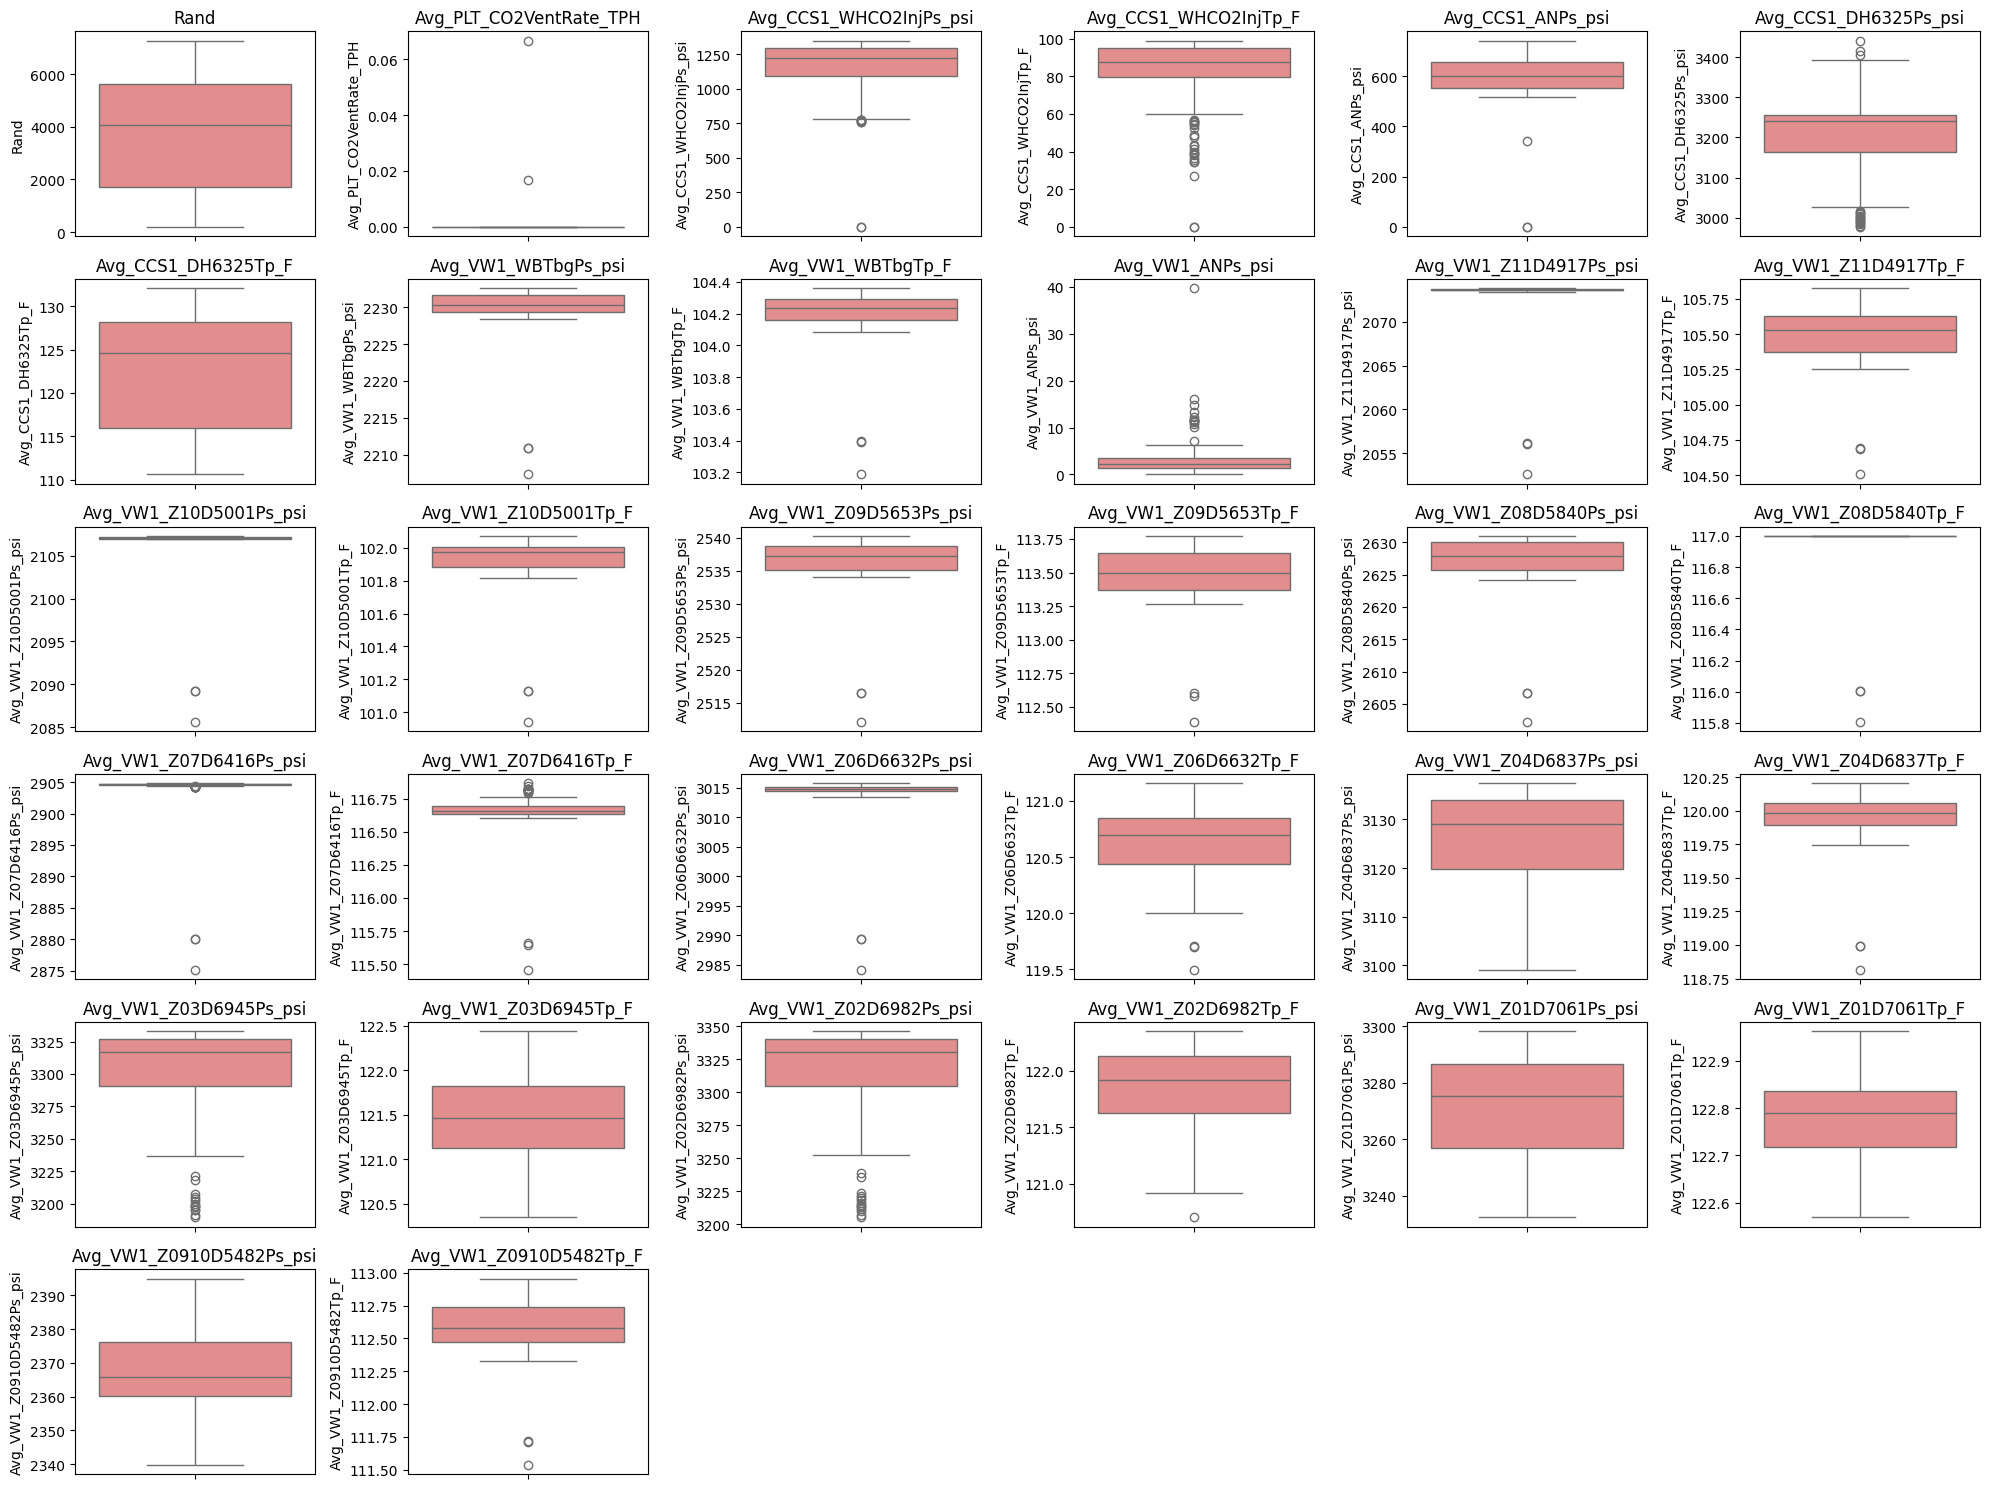

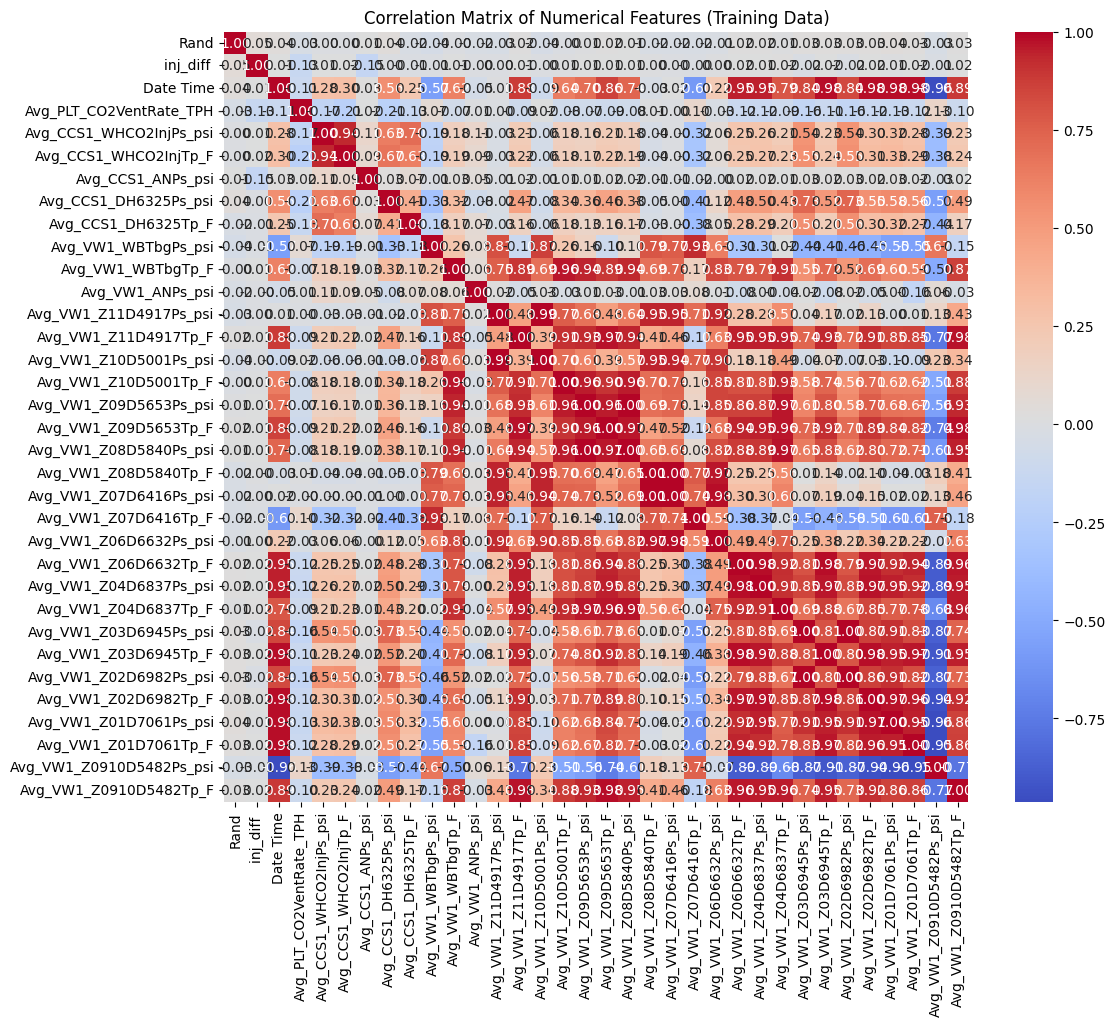


Highly Correlated Features with 'inj_diff':
 Avg_CCS1_ANPs_psi          0.150154
Avg_PLT_CO2VentRate_TPH    0.132169
Rand                       0.053354
Avg_VW1_Z04D6837Tp_F       0.022955
Avg_VW1_Z01D7061Tp_F       0.018894
Name: inj_diff , dtype: float64


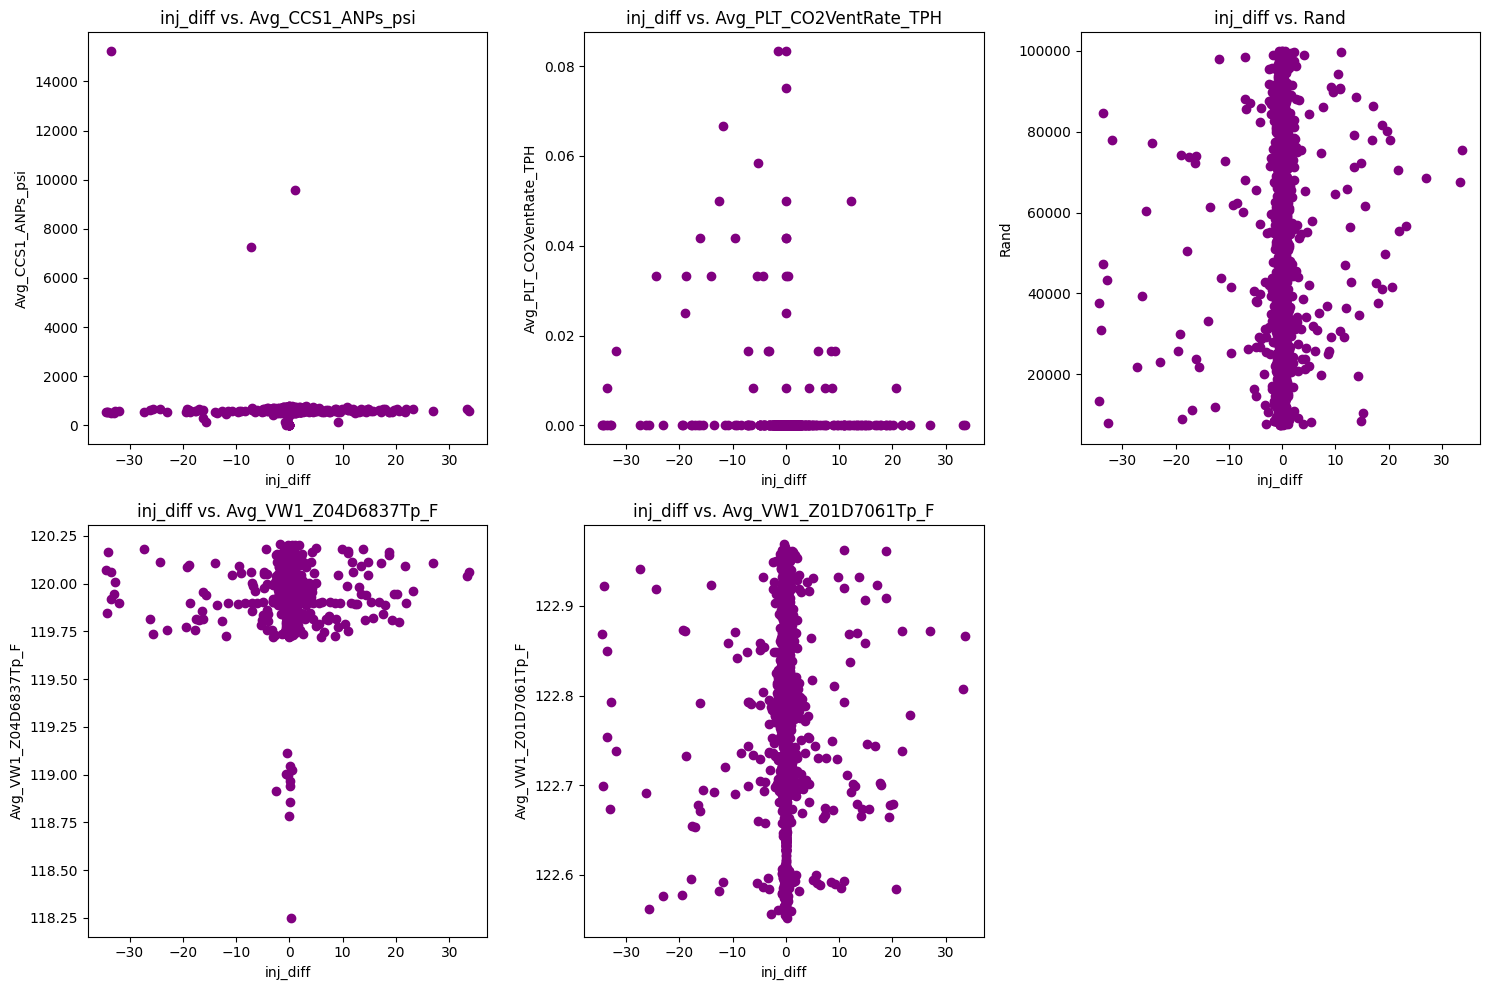


Shape of Training Data: (1715, 34)

Information of Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Rand                      1715 non-null   int64         
 1   inj_diff                  1715 non-null   float64       
 2   Date Time                 1715 non-null   datetime64[ns]
 3   Avg_PLT_CO2VentRate_TPH   1715 non-null   float64       
 4   Avg_CCS1_WHCO2InjPs_psi   1715 non-null   float64       
 5   Avg_CCS1_WHCO2InjTp_F     1715 non-null   float64       
 6   Avg_CCS1_ANPs_psi         1715 non-null   float64       
 7   Avg_CCS1_DH6325Ps_psi     1715 non-null   float64       
 8   Avg_CCS1_DH6325Tp_F       1715 non-null   float64       
 9   Avg_VW1_WBTbgPs_psi       1715 non-null   float64       
 10  Avg_VW1_WBTbgTp_F         1715 non-null   float64       
 11  Avg_VW1_ANPs_ps

None


Shape of Test Data: (149, 33)

Information of Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Rand                      149 non-null    int64         
 1   Date Time                 149 non-null    datetime64[ns]
 2   Avg_PLT_CO2VentRate_TPH   149 non-null    float64       
 3   Avg_CCS1_WHCO2InjPs_psi   149 non-null    float64       
 4   Avg_CCS1_WHCO2InjTp_F     149 non-null    float64       
 5   Avg_CCS1_ANPs_psi         149 non-null    float64       
 6   Avg_CCS1_DH6325Ps_psi     149 non-null    float64       
 7   Avg_CCS1_DH6325Tp_F       149 non-null    float64       
 8   Avg_VW1_WBTbgPs_psi       149 non-null    float64       
 9   Avg_VW1_WBTbgTp_F         149 non-null    float64       
 10  Avg_VW1_ANPs_psi          149 non-null    float64       
 11  Avg_VW1_Z11D4917Ps_psi    

None

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print("Descriptive Statistics for Training Data:")
display(df_train.describe())
print("\nDescriptive Statistics for Test Data:")
display(df_test.describe())

# Data Distribution Visualization - Histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_train.select_dtypes(include=['number']).columns):
    plt.subplot(6, 6, i + 1)
    plt.hist(df_train[col], bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 15))
for i, col in enumerate(df_test.select_dtypes(include=['number']).columns):
    plt.subplot(6, 6, i + 1)
    plt.hist(df_test[col], bins=20, color='salmon')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Data Distribution Visualization - Box Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_train.select_dtypes(include=['number']).columns):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=df_train[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(df_test.select_dtypes(include=['number']).columns):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=df_test[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()


# Correlation Analysis
correlation_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Training Data)')
plt.show()

# Identify highly correlated features with 'inj_diff'
highly_correlated_features = correlation_matrix['inj_diff\xa0'].abs().sort_values(ascending=False)[1:6] # Exclude 'inj_diff' itself
print("\nHighly Correlated Features with 'inj_diff':\n", highly_correlated_features)

# Scatter plots of 'inj_diff' vs. highly correlated features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(highly_correlated_features.index):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df_train['inj_diff\xa0'], df_train[feature], color='purple')
    plt.title(f'inj_diff vs. {feature}')
    plt.xlabel('inj_diff')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


# Data Shape and Information
print("\nShape of Training Data:", df_train.shape)
print("\nInformation of Training Data:")
display(df_train.info())

print("\nShape of Test Data:", df_test.shape)
print("\nInformation of Test Data:")
display(df_test.info())

## Data cleaning

### Subtask:
Clean the training and test datasets by handling missing values and outliers.


**Reasoning**:
Impute missing values and handle outliers in both training and test datasets.



In [4]:
import numpy as np

# Missing Value Imputation
for col in df_train.select_dtypes(include=['number']).columns:
    if df_train[col].isnull().any():
        # Use median imputation for numerical features
        median_val = df_train[col].median()
        df_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        if col in df_test.columns:
            df_test[col].fillna(median_val, inplace=True)

# Outlier Handling using IQR
for col in df_train.select_dtypes(include=['number']).columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df_train[col] = np.clip(df_train[col], lower_bound, upper_bound)
    # Apply same capping to test data
    if col in df_test.columns:
        df_test[col] = np.clip(df_test[col], lower_bound, upper_bound)

# Validation: Check for missing values after imputation
print("Missing values in df_train after imputation:\n", df_train.isnull().sum())
print("\nMissing values in df_test after imputation:\n", df_test.isnull().sum())

# Validation: Check data distribution after outlier handling (example with 'inj_diff')
# ... (Add code to visualize distributions or other validation checks)

Missing values in df_train after imputation:
 Rand                        0
inj_diff                    0
Date Time                   0
Avg_PLT_CO2VentRate_TPH     0
Avg_CCS1_WHCO2InjPs_psi     0
Avg_CCS1_WHCO2InjTp_F       0
Avg_CCS1_ANPs_psi           0
Avg_CCS1_DH6325Ps_psi       0
Avg_CCS1_DH6325Tp_F         0
Avg_VW1_WBTbgPs_psi         0
Avg_VW1_WBTbgTp_F           0
Avg_VW1_ANPs_psi            0
Avg_VW1_Z11D4917Ps_psi      0
Avg_VW1_Z11D4917Tp_F        0
Avg_VW1_Z10D5001Ps_psi      0
Avg_VW1_Z10D5001Tp_F        0
Avg_VW1_Z09D5653Ps_psi      0
Avg_VW1_Z09D5653Tp_F        0
Avg_VW1_Z08D5840Ps_psi      0
Avg_VW1_Z08D5840Tp_F        0
Avg_VW1_Z07D6416Ps_psi      0
Avg_VW1_Z07D6416Tp_F        0
Avg_VW1_Z06D6632Ps_psi      0
Avg_VW1_Z06D6632Tp_F        0
Avg_VW1_Z04D6837Ps_psi      0
Avg_VW1_Z04D6837Tp_F        0
Avg_VW1_Z03D6945Ps_psi      0
Avg_VW1_Z03D6945Tp_F        0
Avg_VW1_Z02D6982Ps_psi      0
Avg_VW1_Z02D6982Tp_F        0
Avg_VW1_Z01D7061Ps_psi      0
Avg_VW1_Z01D7061Tp_F    

<ipython-input-4-dd4bbf7b3a80>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median_val, inplace=True)
<ipython-input-4-dd4bbf7b3a80>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

**Reasoning**:
Fix the chained assignment warnings and add validation plots to check the data distributions after cleaning.



Missing values in df_train after imputation:
 Rand                        0
inj_diff                    0
Date Time                   0
Avg_PLT_CO2VentRate_TPH     0
Avg_CCS1_WHCO2InjPs_psi     0
Avg_CCS1_WHCO2InjTp_F       0
Avg_CCS1_ANPs_psi           0
Avg_CCS1_DH6325Ps_psi       0
Avg_CCS1_DH6325Tp_F         0
Avg_VW1_WBTbgPs_psi         0
Avg_VW1_WBTbgTp_F           0
Avg_VW1_ANPs_psi            0
Avg_VW1_Z11D4917Ps_psi      0
Avg_VW1_Z11D4917Tp_F        0
Avg_VW1_Z10D5001Ps_psi      0
Avg_VW1_Z10D5001Tp_F        0
Avg_VW1_Z09D5653Ps_psi      0
Avg_VW1_Z09D5653Tp_F        0
Avg_VW1_Z08D5840Ps_psi      0
Avg_VW1_Z08D5840Tp_F        0
Avg_VW1_Z07D6416Ps_psi      0
Avg_VW1_Z07D6416Tp_F        0
Avg_VW1_Z06D6632Ps_psi      0
Avg_VW1_Z06D6632Tp_F        0
Avg_VW1_Z04D6837Ps_psi      0
Avg_VW1_Z04D6837Tp_F        0
Avg_VW1_Z03D6945Ps_psi      0
Avg_VW1_Z03D6945Tp_F        0
Avg_VW1_Z02D6982Ps_psi      0
Avg_VW1_Z02D6982Tp_F        0
Avg_VW1_Z01D7061Ps_psi      0
Avg_VW1_Z01D7061Tp_F    

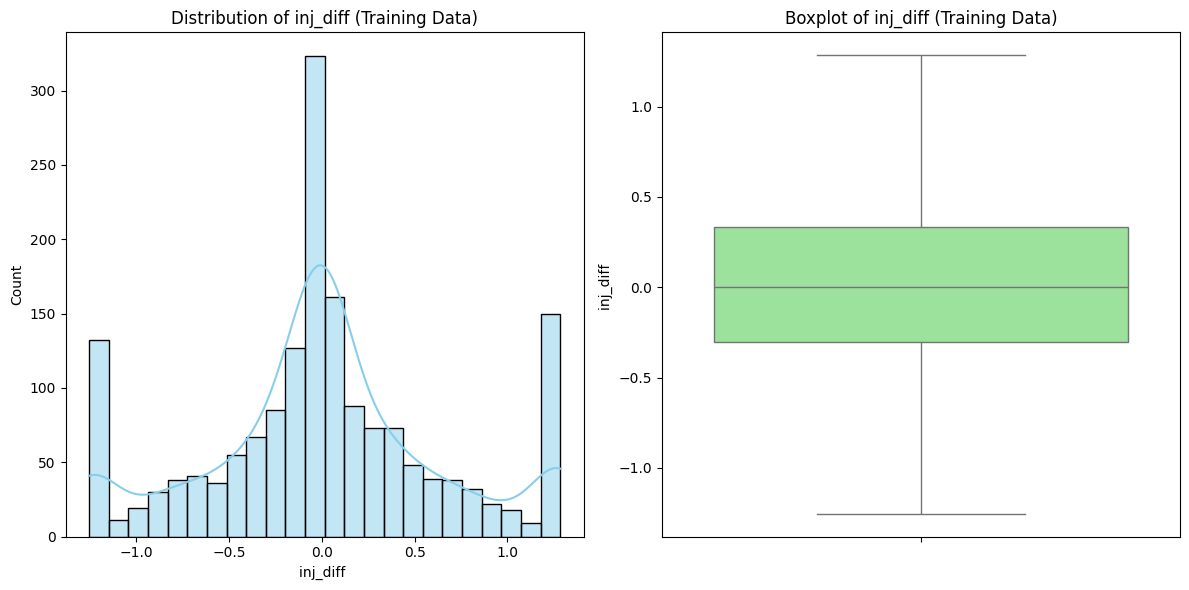

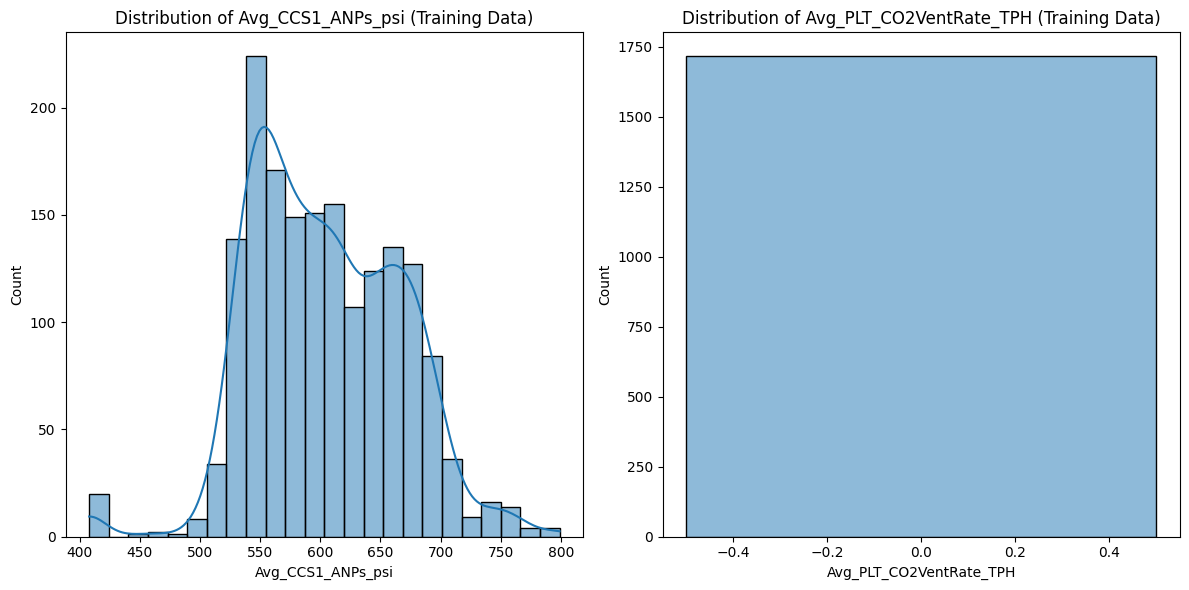

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Value Imputation (Corrected)
for col in df_train.select_dtypes(include=['number']).columns:
    if df_train[col].isnull().any():
        # Use median imputation for numerical features
        median_val = df_train[col].median()
        df_train[col] = df_train[col].fillna(median_val)
        # Apply the same median imputation to the test set
        if col in df_test.columns:
            df_test[col] = df_test[col].fillna(median_val)

# Outlier Handling using IQR (Corrected)
for col in df_train.select_dtypes(include=['number']).columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df_train[col] = np.clip(df_train[col], lower_bound, upper_bound)
    # Apply same capping to test data
    if col in df_test.columns:
        df_test[col] = np.clip(df_test[col], lower_bound, upper_bound)

# Validation: Check for missing values after imputation
print("Missing values in df_train after imputation:\n", df_train.isnull().sum())
print("\nMissing values in df_test after imputation:\n", df_test.isnull().sum())

# Validation: Check data distribution after outlier handling (example with 'inj_diff')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['inj_diff\xa0'], kde=True, color='skyblue')
plt.title('Distribution of inj_diff (Training Data)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['inj_diff\xa0'], color='lightgreen')
plt.title('Boxplot of inj_diff (Training Data)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
for i, col in enumerate(['Avg_CCS1_ANPs_psi', 'Avg_PLT_CO2VentRate_TPH']):
    plt.subplot(1,2, i+1)
    sns.histplot(df_train[col], kde=True)
    plt.title(f"Distribution of {col} (Training Data)")
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Engineer new features from the existing data in `df_train` and apply the same transformations to `df_test`.


**Reasoning**:
Create time-based features, lagged features, rolling statistics, and interaction terms for the training data, then apply the same transformations to the test data.  This addresses the core requirements of the subtask.



In [6]:
import numpy as np
import pandas as pd

# Convert 'Date Time' to datetime objects
df_train['Date Time'] = pd.to_datetime(df_train['Date Time'])
df_test['Date Time'] = pd.to_datetime(df_test['Date Time'])

# Time-Based Features
df_train['DayOfWeek'] = df_train['Date Time'].dt.dayofweek
df_train['Month'] = df_train['Date Time'].dt.month
df_train['Hour'] = df_train['Date Time'].dt.hour
df_train['DayOfYear'] = df_train['Date Time'].dt.dayofyear

df_test['DayOfWeek'] = df_test['Date Time'].dt.dayofweek
df_test['Month'] = df_test['Date Time'].dt.month
df_test['Hour'] = df_test['Date Time'].dt.hour
df_test['DayOfYear'] = df_test['Date Time'].dt.dayofyear

# Cyclical features for hour and day of year
df_train['Hour_sin'] = np.sin(2 * np.pi * df_train['Hour'] / 24)
df_train['Hour_cos'] = np.cos(2 * np.pi * df_train['Hour'] / 24)
df_train['DayOfYear_sin'] = np.sin(2 * np.pi * df_train['DayOfYear'] / 365)
df_train['DayOfYear_cos'] = np.cos(2 * np.pi * df_train['DayOfYear'] / 365)

df_test['Hour_sin'] = np.sin(2 * np.pi * df_test['Hour'] / 24)
df_test['Hour_cos'] = np.cos(2 * np.pi * df_test['Hour'] / 24)
df_test['DayOfYear_sin'] = np.sin(2 * np.pi * df_test['DayOfYear'] / 365)
df_test['DayOfYear_cos'] = np.cos(2 * np.pi * df_test['DayOfYear'] / 365)


# Lagged Features (example with 'Avg_CCS1_ANPs_psi', adjust based on correlation analysis)
lag_days = 1  # Example lag value
df_train['Avg_CCS1_ANPs_psi_lag1'] = df_train['Avg_CCS1_ANPs_psi'].shift(lag_days)
df_test['Avg_CCS1_ANPs_psi_lag1'] = df_test['Avg_CCS1_ANPs_psi'].shift(lag_days)

for lag_days in [2, 3, 7]:  # Experiment with different lag values
    df_train[f'Avg_CCS1_ANPs_psi_lag{lag_days}'] = df_train['Avg_CCS1_ANPs_psi'].shift(lag_days)
    df_test[f'Avg_CCS1_ANPs_psi_lag{lag_days}'] = df_test['Avg_CCS1_ANPs_psi'].shift(lag_days)


# Rolling Statistics (example with 'Avg_CCS1_ANPs_psi', adjust based on analysis)
window_size = 7  # Example window size
df_train['Avg_CCS1_ANPs_psi_rolling_mean'] = df_train['Avg_CCS1_ANPs_psi'].rolling(window=window_size).mean()
df_train['Avg_CCS1_ANPs_psi_rolling_std'] = df_train['Avg_CCS1_ANPs_psi'].rolling(window=window_size).std()
df_test['Avg_CCS1_ANPs_psi_rolling_mean'] = df_test['Avg_CCS1_ANPs_psi'].rolling(window=window_size).mean()
df_test['Avg_CCS1_ANPs_psi_rolling_std'] = df_test['Avg_CCS1_ANPs_psi'].rolling(window=window_size).std()


# Interaction Terms (example, adjust based on analysis)
df_train['Interaction_ANPs_VentRate'] = df_train['Avg_CCS1_ANPs_psi'] * df_train['Avg_PLT_CO2VentRate_TPH']
df_test['Interaction_ANPs_VentRate'] = df_test['Avg_CCS1_ANPs_psi'] * df_test['Avg_PLT_CO2VentRate_TPH']

# Fill NaN values created by lagging and rolling
for df in [df_train, df_test]:
    for col in df.columns:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mean())

display(df_train.head())
display(df_test.head())

,Rand,inj_diff,Date Time,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,...,Hour_cos,DayOfYear_sin,DayOfYear_cos,Avg_CCS1_ANPs_psi_lag1,Avg_CCS1_ANPs_psi_lag2,Avg_CCS1_ANPs_psi_lag3,Avg_CCS1_ANPs_psi_lag7,Avg_CCS1_ANPs_psi_rolling_mean,Avg_CCS1_ANPs_psi_rolling_std,Interaction_ANPs_VentRate
0,13088,0.110069,2024-11-22 04:00:00,0.0,1105.445866,71.965004,591.478453,3320.663664,107.016855,2232.331462,...,5.000000e-01,-0.608477,0.793572,604.145490,604.188651,604.193322,604.287816,604.212365,33.830789,0.0
1,22365,-0.356148,2024-11-22 05:00:00,0.0,1096.617687,72.497477,570.684185,3318.985713,106.693605,2232.333350,...,2.588190e-01,-0.608477,0.793572,591.478453,604.188651,604.193322,604.287816,604.212365,33.830789,0.0
2,64032,-0.153921,2024-11-22 06:00:00,0.0,1096.485427,73.214516,565.322360,3322.928800,106.402567,2232.451115,...,6.123234e-17,-0.608477,0.793572,570.684185,591.478453,604.193322,604.287816,604.212365,33.830789,0.0
3,83725,-0.435417,2024-11-22 07:00:00,0.0,1105.192650,76.607459,620.087081,3315.569511,106.411401,2232.515324,...,-2.588190e-01,-0.608477,0.793572,565.322360,570.684185,591.478453,604.287816,604.212365,33.830789,0.0
4,13827,0.639583,2024-11-22 08:00:00,0.0,1114.396364,76.466836,686.325817,3315.742818,106.941482,2232.518034,...,-5.000000e-01,-0.608477,0.793572,620.087081,565.322360,570.684185,604.287816,604.212365,33.830789,0.0


,Rand,Date Time,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,...,Hour_cos,DayOfYear_sin,DayOfYear_cos,Avg_CCS1_ANPs_psi_lag1,Avg_CCS1_ANPs_psi_lag2,Avg_CCS1_ANPs_psi_lag3,Avg_CCS1_ANPs_psi_lag7,Avg_CCS1_ANPs_psi_rolling_mean,Avg_CCS1_ANPs_psi_rolling_std,Interaction_ANPs_VentRate
0,196,2024-12-03 18:00:00,0.0,803.197196,58.162890,549.814482,3061.771697,115.486600,2231.816545,104.111751,...,-1.836970e-16,-0.448229,0.893919,604.992333,605.388800,605.605491,605.382018,605.574375,63.59775,0.0
1,199,2025-01-25 21:00:00,0.0,1107.391891,80.355995,582.318649,3240.670603,116.430401,2229.016689,104.330812,...,7.071068e-01,0.417194,0.908818,549.814482,605.388800,605.605491,605.382018,605.574375,63.59775,0.0
2,434,2024-12-16 21:00:00,0.0,1325.434039,95.655190,662.075168,3282.452722,127.412783,2231.374359,104.182041,...,7.071068e-01,-0.238673,0.971100,582.318649,549.814482,605.605491,605.382018,605.574375,63.59775,0.0
3,443,2024-12-08 19:00:00,0.0,1226.120394,88.926430,562.333082,3259.085547,122.714026,2232.036442,104.105361,...,2.588190e-01,-0.369725,0.929141,662.075168,582.318649,549.814482,605.382018,605.574375,63.59775,0.0
4,644,2025-01-22 09:00:00,0.0,1155.092736,86.224892,621.546616,3190.583272,122.441536,2229.860781,104.325892,...,-7.071068e-01,0.369725,0.929141,562.333082,662.075168,582.318649,605.382018,605.574375,63.59775,0.0


## Data preparation

### Subtask:
Prepare the data for model training by handling categorical features and scaling numerical features.


**Reasoning**:
Scale numerical features using StandardScaler and separate features and target variable in the training set.



In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'df_train' and 'df_test' are already loaded and cleaned

# Create a list of numerical features (excluding 'inj_diff' and 'Date Time' and 'Rand')
numerical_cols = [col for col in df_train.columns if df_train[col].dtype in [np.float64, np.int64] and col not in ['inj_diff\xa0', 'Date Time', 'Rand']]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
scaler.fit(df_train[numerical_cols])

# Transform the numerical features of both training and test data
df_train_scaled = df_train.copy()
df_train_scaled[numerical_cols] = scaler.transform(df_train[numerical_cols])

df_test_scaled = df_test.copy()
df_test_scaled[numerical_cols] = scaler.transform(df_test[numerical_cols])


# Separate features (X_train) and target variable (y_train) in the training data
X_train = df_train_scaled.drop(columns=['inj_diff\xa0', 'Date Time', 'Rand'])
y_train = df_train_scaled['inj_diff\xa0']

display(X_train.head())
display(y_train.head())


,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_ANPs_psi,Avg_VW1_Z11D4917Ps_psi,...,Hour_cos,DayOfYear_sin,DayOfYear_cos,Avg_CCS1_ANPs_psi_lag1,Avg_CCS1_ANPs_psi_lag2,Avg_CCS1_ANPs_psi_lag3,Avg_CCS1_ANPs_psi_lag7,Avg_CCS1_ANPs_psi_rolling_mean,Avg_CCS1_ANPs_psi_rolling_std,Interaction_ANPs_VentRate
0,0.0,-0.338500,-1.109835,-0.205429,1.274123,-2.180676,1.441122,-2.060738,1.087927,-1.287902,...,0.716996,-1.666479,-2.13681,0.000000,0.000000,0.000000,0.0,0.0,-3.302731e-16,0.0
1,0.0,-0.393735,-1.065213,-0.542908,1.252540,-2.227863,1.442614,-2.097317,1.061455,-1.165046,...,0.376345,-1.666479,-2.13681,-0.205583,0.000000,0.000000,0.0,0.0,-3.302731e-16,0.0
2,0.0,-0.394563,-1.005124,-0.629928,1.303259,-2.270348,1.535685,-1.632133,1.035272,-1.558454,...,0.010781,-1.666479,-2.13681,-0.543068,-0.206370,0.000000,0.0,0.0,-3.302731e-16,0.0
3,0.0,-0.340084,-0.720788,0.258872,1.208598,-2.269058,1.586431,-1.524982,1.030297,-1.933475,...,-0.354782,-1.666479,-2.13681,-0.630089,-0.543997,-0.206447,0.0,0.0,-3.302731e-16,0.0
4,0.0,-0.282500,-0.732573,1.333889,1.210827,-2.191679,1.588572,-1.645527,1.011225,-2.191375,...,-0.695433,-1.666479,-2.13681,0.258728,-0.631055,-0.544076,0.0,0.0,-3.302731e-16,0.0


,inj_diff
0,0.110069
1,-0.356148
2,-0.153921
3,-0.435417
4,0.639583


## Data splitting

### Subtask:
Split the preprocessed training data (`X_train`, `y_train`) into training and validation sets.


**Reasoning**:
Split the preprocessed training data (X_train, y_train) into training and validation sets using train_test_split.



In [8]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Model training

### Subtask:
Train several regression models on the training data (`X_train_final`, `y_train_final`)


**Reasoning**:
Train several regression models on the training data (`X_train_final`, `y_train_final`).



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor  # Import XGBoost

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)  # Add XGBoost to the dictionary
}

# Train the models
for name, model in models.items():
    model.fit(X_train_final, y_train_final)

# ... (rest of the code) ...

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained regression models using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the trained regression models using RandomizedSearchCV, as per the instructions.



In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint, uniform, loguniform

# Define parameter distributions for each model
param_distributions = {
    "Random Forest": {
        "n_estimators": randint(50, 200),
        "max_depth": randint(10, 50),
        "min_samples_split": randint(2, 20),
    },
    "Gradient Boosting": {
        "n_estimators": randint(50, 200),
        "learning_rate": loguniform(1e-3, 1e-1),
        "max_depth": randint(3, 10),
        "subsample": uniform(0.5, 0.5),
    },
    "XGBoost": {  # Add hyperparameter grid for XGBoost
        'n_estimators': randint(50, 200),
        'learning_rate': loguniform(1e-3, 1e-1),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.5, 0.5),
    }
}

# Create RandomizedSearchCV objects for each model
random_search_models = {}
for name, model in models.items():
    if name in param_distributions:
        random_search = RandomizedSearchCV(
            model,
            param_distributions[name],
            n_iter=50,
            scoring="r2",
            cv=5,
            random_state=42,
            n_jobs=-1,
        )
        random_search_models[name] = random_search


# Fit the RandomizedSearchCV objects
for name, random_search in random_search_models.items():
    # Use y_train_final instead of y_train for fitting
    random_search.fit(X_train_final, y_train_final)


## Model evaluation

### Subtask:
Evaluate the performance of the optimized Random Forest and Gradient Boosting models on the validation set (X_val, y_val).  Select the best-performing model based on R-squared.


**Reasoning**:
Evaluate the performance of the optimized Random Forest and Gradient Boosting models on the validation set (X_val, y_val) and select the best model based on R-squared.



In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the models
for name, random_search in random_search_models.items():
    y_pred = random_search.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    # Calculate RMSE manually
    rmse = mean_squared_error(y_val, y_pred) ** 0.5
    mae = mean_absolute_error(y_val, y_pred)
    accuracy_percentage = r2 * 100
    print(f"{name}:")
    print(f"  R-squared: {r2}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  Accuracy Percentage: {accuracy_percentage:.2f}%")

# Select the best model based on R-squared
best_model_name = max(random_search_models, key=lambda k: random_search_models[k].best_score_)
best_model = random_search_models[best_model_name]
print(f"\nBest model: {best_model_name}")

if best_model_name == "XGBoost":
    # Get the best XGBoost model from RandomizedSearchCV
    best_xgb_model = best_model.best_estimator_

    # Create X_test from df_test_scaled, ensuring it has the same columns as X_train_final
    X_test = df_test_scaled[X_train_final.columns]  # Use X_train_final.columns for consistency

    # Predict on the test data using the best XGBoost model
    y_pred_test = best_xgb_model.predict(X_test)

    # Create a submission DataFrame
    submission_df = pd.DataFrame({'Rand': df_test['Rand'], 'inj_diff': y_pred_test})

    # Save the submission DataFrame to a CSV file
    submission_df.to_csv('submission.csv', index=False)
else:
    print(f"The best model is not XGBoost, but {best_model_name}. Skipping XGBoost-specific prediction.")

Random Forest:
  R-squared: 0.036245792295683255
  RMSE: 0.613880148566608
  MAE: 0.4385019625965042
  Accuracy Percentage: 3.62%
Gradient Boosting:
  R-squared: -0.005047987445263802
  RMSE: 0.6268936129543653
  MAE: 0.4455789226025502
  Accuracy Percentage: -0.50%
XGBoost:
  R-squared: 0.004156738324744169
  RMSE: 0.6240163092225487
  MAE: 0.4430725939516321
  Accuracy Percentage: 0.42%

Best model: XGBoost


**Reasoning**:
Fix the error in the previous code block by removing the `squared=False` argument from the `mean_squared_error` function, as it is not supported in the current version of scikit-learn. Then execute the code block again.



In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the models
for name, random_search in random_search_models.items():
    y_pred = random_search.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred) ** 0.5 # Calculate RMSE manually
    mae = mean_absolute_error(y_val, y_pred)
    accuracy_percentage = r2 * 100
    print(f"{name}:")
    print(f"  R-squared: {r2}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  Accuracy Percentage: {accuracy_percentage:.2f}%")

# Select the best model based on R-squared
best_model_name = max(random_search_models, key=lambda k: random_search_models[k].best_score_)
best_model = random_search_models[best_model_name]
print(f"\nBest model: {best_model_name}")

Random Forest:
  R-squared: 0.036245792295683255
  RMSE: 0.613880148566608
  MAE: 0.4385019625965042
  Accuracy Percentage: 3.62%
Gradient Boosting:
  R-squared: -0.005047987445263802
  RMSE: 0.6268936129543653
  MAE: 0.4455789226025502
  Accuracy Percentage: -0.50%
XGBoost:
  R-squared: 0.004156738324744169
  RMSE: 0.6240163092225487
  MAE: 0.4430725939516321
  Accuracy Percentage: 0.42%

Best model: XGBoost


## Data preparation

### Subtask:
Prepare the test data (`df_test_scaled`) for prediction using the best model.


**Reasoning**:
Create X_test from df_test_scaled by dropping the same columns as in X_train, and then check if X_test and X_train_final have the same number of columns.



In [13]:
# Create X_test from df_test_scaled
X_test = df_test_scaled.drop(columns=['Date Time', 'Rand'])

# Check the shapes of X_train_final and X_test
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_test:", X_test.shape)

# If the number of columns doesn't match, print an error message
if X_train_final.shape[1] != X_test.shape[1]:
    print("Error: X_train_final and X_test have different number of columns.")
    print("X_train_final columns:", X_train_final.columns.tolist())
    print("X_test columns:", X_test.columns.tolist())

Shape of X_train_final: (1372, 46)
Shape of X_test: (149, 46)


## Model evaluation

### Subtask:
Use the best model (identified in the previous step) to predict 'inj_diff' for the test data (`X_test`) and generate the prediction result file.


**Reasoning**:
Use the best model to predict 'inj_diff' for the test data and save the predictions to a CSV file.



In [14]:
# Predict 'inj_diff' for the test data
y_pred_test = best_model.predict(X_test)

# Create a submission DataFrame
submission_df = pd.DataFrame({'Rand': df_test['Rand'], 'inj_diff': y_pred_test})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)